# PCA on Iris Data Set

__Why this notebook__
To have hands-on exercise on PCA using Python

__Reference__ None. Since IRIS Dataset is easily available, chosen that to try PCA

In [1]:
import numpy as np
import matplotlib.pyplot as plt # for plotting
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler # for column standardization
from scipy.linalg import eigh # for eigen value/vector calculation

## Load Data Set

In [2]:
df = pd.read_csv('../../../datasets/iris-dataset/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
# move labels to a seperate data frame
df_labels = df['species']
df_data = df.drop('species',axis=1)

In [5]:
df_labels.shape

(150,)

In [6]:
df_labels.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

In [7]:
df_data.shape

(150, 4)

In [8]:
df_data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Column Standardize the Data

In [9]:
# Column Standardize the data
standardized_data = StandardScaler().fit_transform(df_data)

In [10]:
standardized_data.shape

(150, 4)

In [11]:
standardized_data[1:4]

array([[-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673]])

## Computing PCA manually

### Compute Covariance Matrix

In [12]:
# Compute covariance Matrix
sample_data = standardized_data
covar_matrix = np.matmul(sample_data.T,sample_data)
covar_matrix.shape

(4, 4)

In [13]:
covar_matrix

array([[150.        , -16.40538749, 130.7631236 , 122.69304501],
       [-16.40538749, 150.        , -63.07741446, -53.48161344],
       [130.7631236 , -63.07741446, 150.        , 144.41356456],
       [122.69304501, -53.48161344, 144.41356456, 150.        ]])

### Compute Eigen Values and Eigen Vectors

In [14]:
# calculate eignen values and eigen vectors
eigen_values, eigen_vectors = eigh(covar_matrix)

In [15]:
eigen_values.shape

(4,)

In [16]:
eigen_vectors.shape

(4, 4)

In [17]:
eigen_values

array([  3.09115609,  22.10299175, 138.18313961, 436.62271256])

In [18]:
eigen_vectors

array([[ 0.26199559,  0.72101681, -0.37231836,  0.52237162],
       [-0.12413481, -0.24203288, -0.92555649, -0.26335492],
       [-0.80115427, -0.14089226, -0.02109478,  0.58125401],
       [ 0.52354627, -0.6338014 , -0.06541577,  0.56561105]])

### 2-D Visualization

In [19]:
# Since we are going to do 2-D visualization, take last two eigen vectors having max variances
eigen_2d = eigen_vectors[:,[-1,-2]]
eigen_2d = eigen_2d.T
eigen_2d.shape

(2, 4)

In [20]:
# project data points into hyper plane
new_data_matrix = np.matmul(eigen_2d,standardized_data.T)

In [21]:
'Resultant matrix {0} x {1} = {2}'.format(eigen_2d.shape,standardized_data.T.shape,new_data_matrix.shape)

'Resultant matrix (2, 4) x (4, 150) = (2, 150)'

In [22]:
# Add label column
new_data_matrix = np.vstack((new_data_matrix, df_labels))

In [23]:
new_data_matrix.shape

(3, 150)

In [24]:
# Transpose the matrix to have data points as rows
new_data_matrix = new_data_matrix.T
new_data_matrix.shape

(150, 3)

In [25]:
new_data_matrix[:5]

array([[-2.2645417283949003, -0.5057039027737857, 'setosa'],
       [-2.08642550061616, 0.6554047293691359, 'setosa'],
       [-2.3679504490625267, 0.31847731084724806, 'setosa'],
       [-2.3041971611520102, 0.5753677125331943, 'setosa'],
       [-2.3887774935056423, -0.6747673967025166, 'setosa']], dtype=object)

In [26]:
# Create a data frame using new data matrix for plotting
new_data_df = pd.DataFrame(data=new_data_matrix,columns=['PC1','PC2','label'])
new_data_df.head()

,PC1,PC2,label
0,-2.26454,-0.505704,setosa
1,-2.08643,0.655405,setosa
2,-2.36795,0.318477,setosa
3,-2.3042,0.575368,setosa
4,-2.38878,-0.674767,setosa


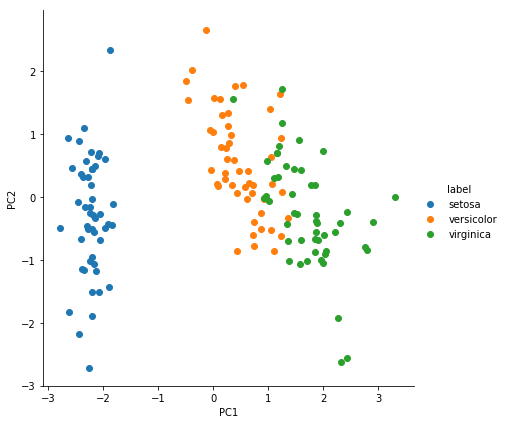

In [27]:
sns.FacetGrid(data=new_data_df,hue='label',height=6).map(plt.scatter,'PC1','PC2').add_legend()

## PCA using SciKit-Learn

In [28]:
# import required modules
from sklearn import decomposition

In [29]:
# init PCA
pca = decomposition.PCA()

### 2-D Visualization

In [30]:
# config required parameters
pca.n_components = 2
pca_data = pca.fit_transform(standardized_data)

print('Size of PCA reducated data shape: ', pca_data.shape)

Size of PCA reducated data shape:  (150, 2)


In [31]:
# add labels to PCA new data matrix for plotting
pca_data = np.vstack((pca_data.T, df_labels)).T
print('New Projected Matrix shape : ', pca_data.shape)

New Projected Matrix shape :  (150, 3)


In [32]:
# create dataframe out of PCA Data
new_data_df = pd.DataFrame(data=pca_data, columns=['PC1','PC2','labels'])
new_data_df.head()

,PC1,PC2,labels
0,-2.26454,0.505704,setosa
1,-2.08643,-0.655405,setosa
2,-2.36795,-0.318477,setosa
3,-2.3042,-0.575368,setosa
4,-2.38878,0.674767,setosa


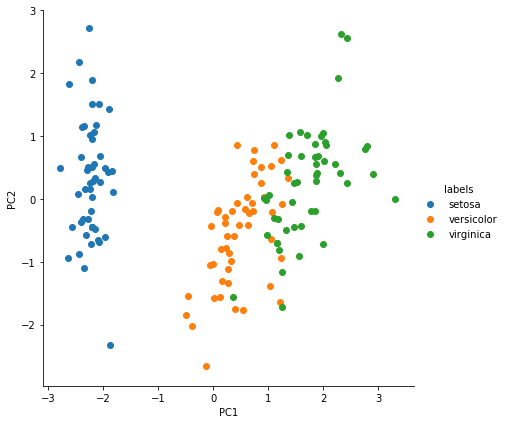

In [33]:
# Plot the matrix
sns.FacetGrid(new_data_df, hue='labels',height=6).map(plt.scatter, 'PC1', 'PC2').add_legend()

### CDF of Data Variances

In [34]:
pca.n_components = 4
pca_data = pca.fit_transform(standardized_data)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_)
print('Percentage of data explained: ',percentage_var_explained)

cum_var_explained = np.cumsum(percentage_var_explained)

print('Cumulative Sum of Vairances explained : ', cum_var_explained)


Percentage of data explained:  [0.72770452 0.23030523 0.03683832 0.00515193]
Cumulative Sum of Vairances explained :  [0.72770452 0.95800975 0.99484807 1.        ]


Text(0, 0.5, 'Cumulative Explained Variance')

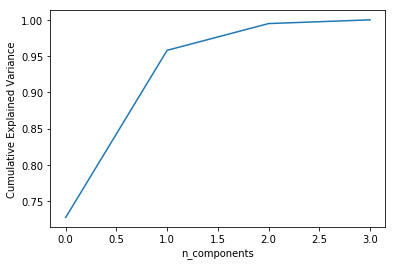

In [35]:
plt.figure(1, figsize=(6,4))
plt.plot(cum_var_explained)
plt.xlabel('n_components')
plt.ylabel('Cumulative Explained Variance')

### Pair Plot of all components

In [36]:
print(pca_data.T.shape, df_labels.shape)
pca_data = np.vstack((pca_data.T, df_labels))
pca_data = pca_data.T
print(pca_data.shape)

(4, 150) (150,)
(150, 5)


In [37]:
new_data_df = pd.DataFrame(data=pca_data,columns=['PC1','PC2','PC3','PC4','labels'])
new_data_df.head()

,PC1,PC2,PC3,PC4,labels
0,-2.26454,0.505704,-0.121943,-0.0230733,setosa
1,-2.08643,-0.655405,-0.227251,-0.103208,setosa
2,-2.36795,-0.318477,0.0514796,-0.0278252,setosa
3,-2.3042,-0.575368,0.0988604,0.0663115,setosa
4,-2.38878,0.674767,0.0214278,0.0373973,setosa


/home/mlstudy/anaconda3/envs/mlstudy_1/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


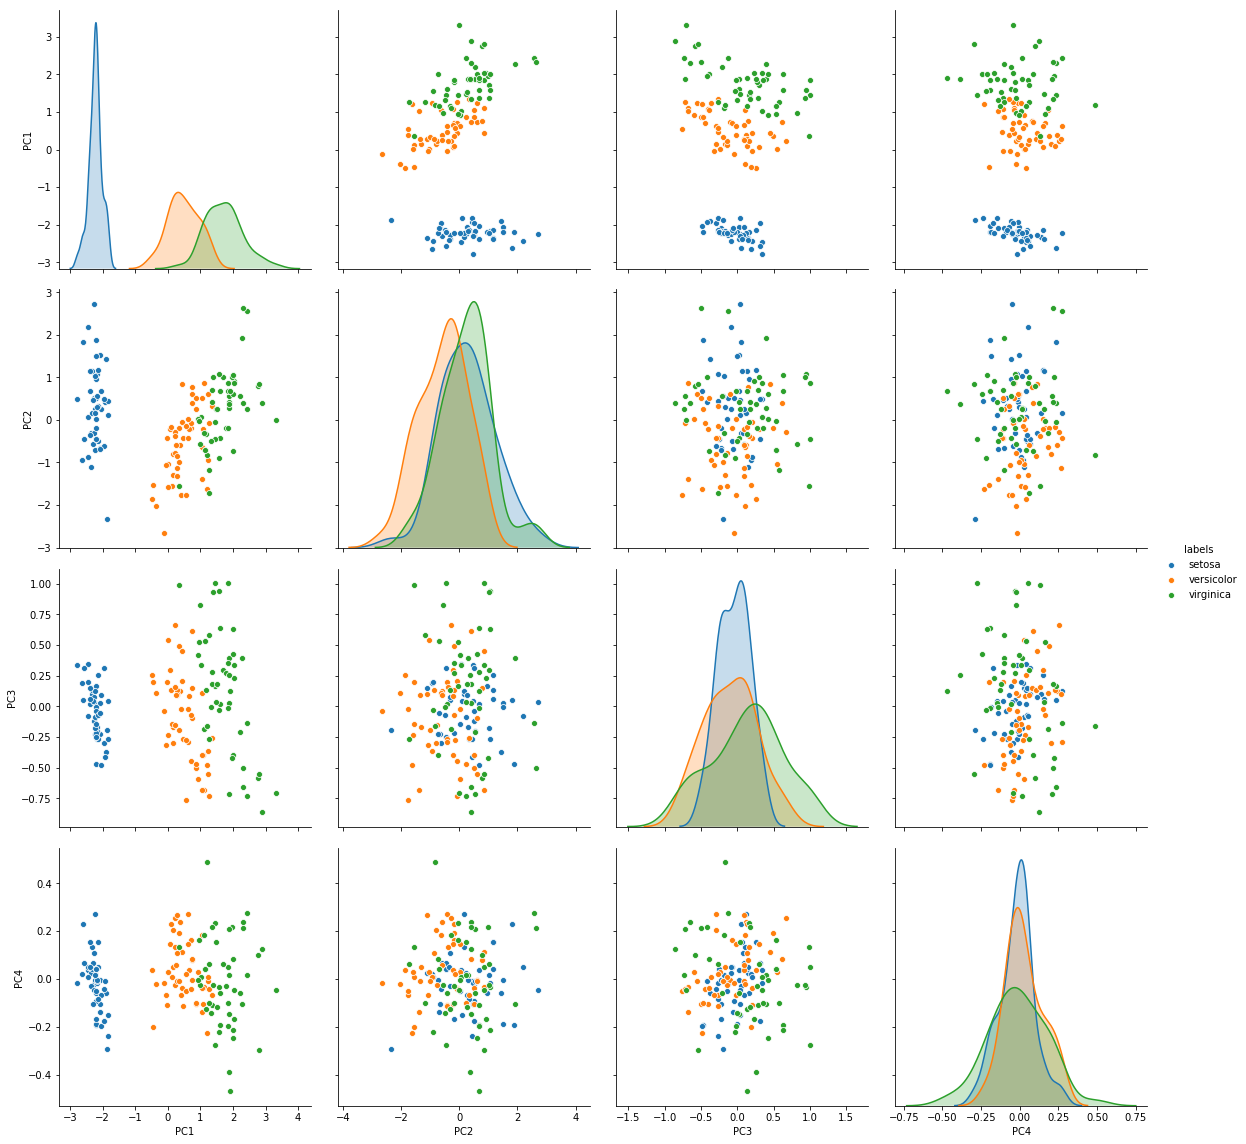

In [38]:
sns.pairplot(new_data_df, hue='labels', vars=['PC1','PC2','PC3','PC4'],height=4)

In [39]:
#plt.scatter(pca_data[:,0], pca_data[:,1],c=df_labels)
df_labels.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [40]:
# create map of labels to int for plotting
targets = df_labels.unique()
targets

array(['setosa', 'versicolor', 'virginica'], dtype=object)